# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
morphs = []
sentences = []

with open('neko.txt.mecab', encoding='utf-8') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            attrs = fields[1].split(',')
            morph = {'surface':fields[0], 'base':attrs[6], 'pos':attrs[0], 'pos1':attrs[1]}
            morphs.append(morph)
        else:
            if len(morphs) > 0:
                sentences.append(morphs)
                morphs = []

# 31. 動詞

動詞の表層形をすべて抽出せよ．

In [3]:
verbs = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verbs.add(morph['surface'])
            
#from collections import Counter
#c = Counter(verbs)
#dict(sorted(c.items(), key=lambda item: item[1], reverse=True))

# 32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [4]:
verb_stems = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verb_stems.add(morph['base'])

# 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
a_no_bs = set()

for sentence in sentences:
    for index in range(len(sentence) - 2):
        
        w0 = sentence[index]
        w1 = sentence[index + 1]
        w2 = sentence[index + 2]
        
        if w0['pos'] == '名詞' and w1['surface'] == 'の' and w2['pos'] == '名詞':
            a_no_bs.add(w0['surface'] + 'の' + w2['surface'])

# 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [23]:
noun_series = set()

for sentence in sentences:
    
    candidate = []
    
    for morph in sentence:
        
        if morph['pos'] == '名詞':
            candidate.append(morph['surface'])
        else:
            if len(candidate) > 1:
                noun_series.add(''.join(candidate))
            candidate = []
            
    if len(candidate) > 1:
        noun_series.add(''.join(candidate))

# 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [76]:
from collections import defaultdict 

word_counts = defaultdict(int)

for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            base = morph['base']
            word_counts[base] += 1

word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

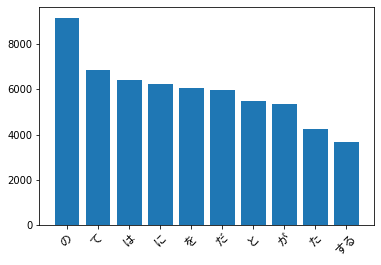

In [77]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='NotoSansJP-Regular.otf')

words, counts = zip(*word_counts[:10])
plt.bar(words, counts)
plt.xticks(range(len(words)), words, fontproperties=fprop, fontsize=12, rotation=45)
plt.show()

# 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

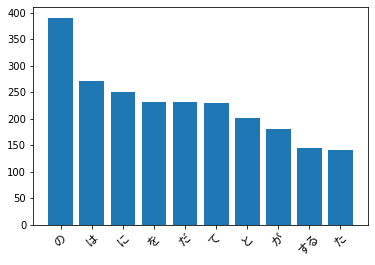

In [82]:
neko_counts = defaultdict(int)

for sentence in sentences:
    
    with_neko = False 
    for morph in sentence:
        if morph['base'] == '猫':
            with_neko = True
            break
            
    #if '猫' in [morph['surface'] for morph in sentence]:
    if with_neko:
        for morph in sentence:
            if morph['pos'] != '記号':  
                neko_counts[morph['base']] += 1

del(neko_counts['猫'])
neko_counts = sorted(neko_counts.items(), key=lambda item: item[1], reverse=True)

words, counts = zip(*neko_counts[:10])
plt.bar(words, counts)
plt.xticks(range(len(words)), words, fontproperties=fprop, fontsize=12, rotation=45)
plt.show()

# 38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

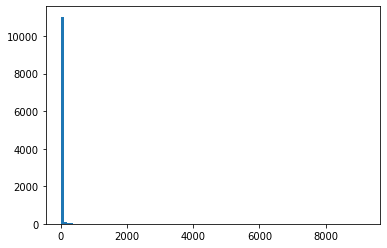

In [102]:
words, counts = zip(*word_counts)
plt.hist(counts, bins = 100)
plt.show()

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

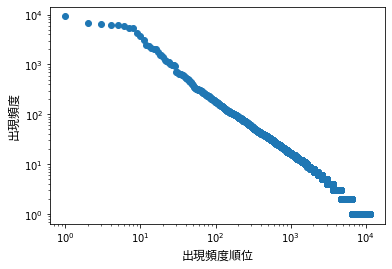

In [141]:
ranks = np.arange(len(counts)) + 1
plt.scatter(ranks, counts)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位', fontproperties=fprop, fontsize=12)
plt.ylabel('出現頻度', fontproperties=fprop, fontsize=12)
plt.show()

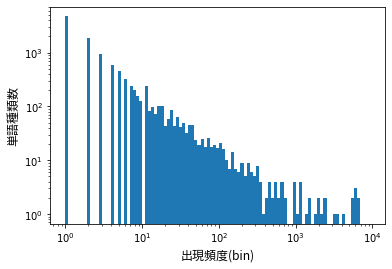

In [140]:
#誤解によるおまけ（その一）
plt.hist(counts, bins = 10**np.linspace(np.log10(min(counts)), np.log10(max(counts)), num=100), log=True)
plt.xscale('log')
plt.xlabel('出現頻度(bin)', fontproperties=fprop, fontsize=12)
plt.ylabel('単語種類数', fontproperties=fprop, fontsize=12)
plt.show()

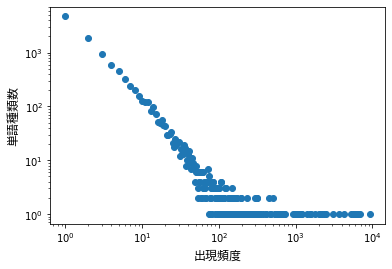

In [139]:
#誤解によるおまけ（その二）
num = []
freq = []

for i in range(max(counts)+1):
    if i in counts:
        num.append(i)
        freq.append(counts.count(i))

plt.scatter(num, freq)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度', fontproperties=fprop, fontsize=12)
plt.ylabel('単語種類数', fontproperties=fprop, fontsize=12)
plt.show()